In [1]:
import numpy as np
import pandas as pd
import pytesseract
import glob
import matplotlib.pyplot as plt
from os.path import basename

import os
import cv2 

#import lib. and pac. 

#from scipy import stats

### Pytesseract имеет нюансы использования на платформе Windows. Данный скрипт определяет имя пользователя и добавляет его путь для настройки pytesseract.

In [2]:
user_name = os.environ.get( "USERNAME" )
pytesseract.pytesseract.tesseract_cmd =r"C:/Users/"+ user_name +"/AppData/Local/Tesseract-OCR/tesseract.exe"#setiing pytesseract

### В названиях файлов много пробелов. Переименуем файлы в более простые, чтобы не было проблем с путями. Скрипт необходимо выполнить 1 раз.

In [119]:
expansion = "png"
img_number = 1
dir = 'C:/Users/igor/Data_science/Test/unet/data40/images_prepped_train'
for file in os.listdir(dir):
    if file.endswith(expansion):
        os.rename(f'{dir}/{file}', f'{dir}/{img_number}.{expansion}')
        img_number += 1

In [2]:
cv2.__version__

'4.2.0'

### Функция для распознавания цифр на неподготовленном изображении
#### Для преобразования изображения в текст будем использовать pytesseract. Сразу напишем функцию, для преобразования изображения в текст

In [3]:
def image_to_string(image):
    '''Функция принимает на вход изображение и преобразует в строку
       input: image
       output: string'''
    custom_oem_psm_config = config='--psm 6 -c tessedit_char_whitelist=0123456789'# pytesseract setting
    text=pytesseract.image_to_string(image, config=custom_oem_psm_config)# convert image to string
    return text

#### Выполним обзор изображений и попробуем сразу их распознать

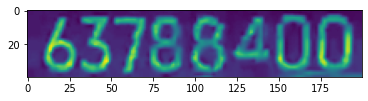

In [4]:
path_to_image = "unet/data40/images_prepped_train/44.png"
image_number = cv2.imread(path_to_image,cv2.IMREAD_GRAYSCALE) # open original image and view
plt.imshow(image_number)
plt.show()

In [5]:
image_to_string(image_number)

'63788400'

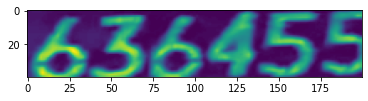

In [6]:
path_to_image = "unet/data40/images_prepped_train/10.png"
image_number = cv2.imread(path_to_image,cv2.IMREAD_GRAYSCALE) # open original image and view
plt.imshow(image_number)
plt.show()

In [7]:
image_to_string(image_number)

'434455'

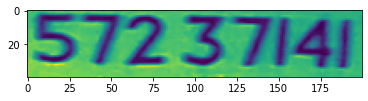

In [8]:
path_to_image = "unet/data40/images_prepped_train/1632.png"
image_number = cv2.imread(path_to_image,cv2.IMREAD_GRAYSCALE) # open original image and view
plt.imshow(image_number)
plt.show()

In [9]:
image_to_string(image_number)

'5723714'

#### Из результатов видно, что алгоритм распознаёт, но частично. На первом этапе для оценки будем сразу подавать изображение в pytesseract без предварительной обработки. 
#### Напишем функцию для считывания изображения.

In [10]:
def read_image(path_to_image):
    '''Функция принимает на вход путь до изображения и считывает его.
    input: path to image
    output: image'''
    image_read = cv2.imread(path_to_image,cv2.IMREAD_GRAYSCALE) # open original image and view
    return image_read

#### Выполним поиск всех путей изображений

In [11]:
list_path_file = glob.glob(r'C:\Users\igor\Data_science\Test\unet\data40\images_prepped_train*\*.png')
list_path_file = [i.replace('\\', '/') for i in list_path_file]

#### В цикле будем использовать уже написанные функции считывания изображения и распознавания

In [12]:
sample_numbers_list=[]
i=0
for path in list_path_file:
    image = read_image(path)
    string_im = image_to_string(image)
    sample_numbers_list.append({'name_photo': int(os.path.splitext(os.path.basename(list_path_file[i]))[0]),
                                      'numbers_vagon': string_im})
    i+=1

In [16]:
(sample_numbers_list[:10])

[{'name_photo': 1, 'numbers_vagon': '55'},
 {'name_photo': 10, 'numbers_vagon': '434455'},
 {'name_photo': 100, 'numbers_vagon': '64387905'},
 {'name_photo': 1000, 'numbers_vagon': '94177638'},
 {'name_photo': 1001, 'numbers_vagon': '665636'},
 {'name_photo': 1002, 'numbers_vagon': '414'},
 {'name_photo': 1003, 'numbers_vagon': '374'},
 {'name_photo': 1004, 'numbers_vagon': '5105910'},
 {'name_photo': 1005, 'numbers_vagon': '144\n518'},
 {'name_photo': 1006, 'numbers_vagon': '9009714'}]

#### Список получился неупорядоченным. Преобразуем его в DataFrame и сразу отсортируем сбросив индексацию.

In [105]:
sample_numbers_list_df=pd.DataFrame(sample_numbers_list).sort_values('name_photo',ignore_index=True)

In [106]:
sample_numbers_list_df # В таблице 6000 строк, данные не потерялись.

,name_photo,numbers_vagon
0,1,55
1,2,61758835
2,3,5275
3,4,60064750
4,5,
...,...,...
5995,5996,52626845
5996,5997,51660165
5997,5998,5454044
5998,5999,


#### Откроем предварительно набранный файл с номерами вагонов

In [107]:
real_vagon_numbers = pd.read_csv('real_vagon_numbers.csv')

In [108]:
real_vagon_numbers

,real_vagon_numbers
0,54195151
1,61758835
2,5869371
3,60064250
4,61590675
...,...
1996,59909697
1997,59909697
1998,59926782
1999,58806860


#### Поскольку реальных значений 2001 строка, возьмём первые 2001 строку из sample_numbers_list_df

In [109]:
sample_numbers_list_df = sample_numbers_list_df.head(2001)

In [110]:
sample_numbers_list_df

,name_photo,numbers_vagon
0,1,55
1,2,61758835
2,3,5275
3,4,60064750
4,5,
...,...,...
1996,1997,
1997,1998,
1998,1999,59926782
1999,2000,804860


#### Объединим DataFrame с распознанными значениями с DataFrame с реальными значениями

In [111]:
concat_df=pd.concat([sample_numbers_list_df, real_vagon_numbers], axis=1)

#### Поскольку в распознанной серии остались пустые значения, на данном этапе будет проще преобразовать real_vagon_numbers в строку

In [112]:
concat_df['real_vagon_numbers']=concat_df['real_vagon_numbers'].apply(str)

In [113]:
concat_df.head(10)

,name_photo,numbers_vagon,real_vagon_numbers
0,1,55,54195151
1,2,61758835,61758835
2,3,5275,5869371
3,4,60064750,60064250
4,5,,61590675
5,6,,59090589
6,7,77798593,77798593
7,8,78014792,78014792
8,9,29136751,29136751
9,10,434455,636455


#### Добавим колонку с результатом сравнения

In [114]:
concat_df['results']=concat_df['numbers_vagon']==concat_df['real_vagon_numbers']

In [115]:
concat_df.head(10)

,name_photo,numbers_vagon,real_vagon_numbers,results
0,1,55,54195151,False
1,2,61758835,61758835,True
2,3,5275,5869371,False
3,4,60064750,60064250,False
4,5,,61590675,False
5,6,,59090589,False
6,7,77798593,77798593,True
7,8,78014792,78014792,True
8,9,29136751,29136751,True
9,10,434455,636455,False


In [116]:
concat_df['results'].value_counts()

False    1551
True      450
Name: results, dtype: int64

In [117]:
450*100/1551

29.013539651837526

#### Без предварительной обработки результат сразу 29%.

### Функция для распознавания цифр на подготовленном изображении
#### На следующем этапе попробуем применить фильт, который будет замыкать разрывы на номерах, нарисованных под трафарет. На завершающем этапе будем использовать бинаризацию изображения.

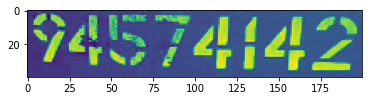

In [150]:
path_to_image = "unet/data40/images_prepped_train/47.png"
image = cv2.imread(path_to_image,cv2.IMREAD_GRAYSCALE) # open original image and view
plt.imshow(image)
plt.show()

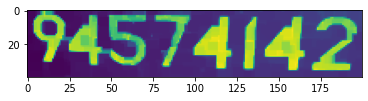

In [152]:
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)
plt.show()

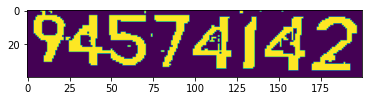

In [155]:
bin_image=cv2.adaptiveThreshold(closing,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,-4)
plt.imshow(bin_image)
plt.show()

In [156]:
image_to_string(th2)

'94574142'

#### Реализуем данный подход функционально

In [186]:
def closing_image(image_read):
    '''Функция принимает на вход изображение и применяет к нему
        операцию closing для замыкания разрывов
        input: image
        output: closing image'''
    kernel = np.ones((4,4),np.uint8)
    closing = cv2.morphologyEx(image_read, cv2.MORPH_CLOSE, kernel)
    return closing

In [189]:
def image_binarization(closing):
    '''Функция принимает на вход изображение и выполняет адаптивную бинаризацию
        input: closing image
        output: binarization image'''
    image_binarization=cv2.adaptiveThreshold(closing,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,-5)
    return image_binarization

#### Выполним распознавание используя предварительно closing и adaptive binarization

In [198]:
closing_bin_numbers_list=[]
i=0
for path in list_path_file:
    image = read_image(path)
    closing=closing_image(image)
    bin_image = image_binarization(closing)
    string_im = image_to_string(bin_image)
    closing_bin_numbers_list.append({'name_photo': int(os.path.splitext(os.path.basename(list_path_file[i]))[0]),
                                      'numbers_vagon': string_im})
    i+=1

In [199]:
closing_bin_numbers_list=pd.DataFrame(closing_bin_numbers_list).sort_values('name_photo',ignore_index=True)

In [200]:
closing_bin_numbers_list = closing_bin_numbers_list.head(2001)

In [201]:
closing_bin_numbers_list.head(10)

,name_photo,numbers_vagon
0,1,549551
1,2,61758835
2,3,
3,4,2
4,5,
5,6,3735
6,7,3
7,8,497
8,9,91
9,10,4455


In [202]:
closing_bin_concat_df=pd.concat([closing_bin_numbers_list, real_vagon_numbers], axis=1)
closing_bin_concat_df['real_vagon_numbers']=closing_bin_concat_df['real_vagon_numbers'].apply(str)
closing_bin_concat_df['results']=closing_bin_concat_df['numbers_vagon']==closing_bin_concat_df['real_vagon_numbers']

In [203]:
closing_bin_concat_df

,name_photo,numbers_vagon,real_vagon_numbers,results
0,1,549551,54195151,False
1,2,61758835,61758835,True
2,3,,5869371,False
3,4,2,60064250,False
4,5,,61590675,False
...,...,...,...,...
1996,1997,,59909697,False
1997,1998,59909697,59909697,True
1998,1999,59926782,59926782,True
1999,2000,,58806860,False


In [204]:
closing_bin_concat_df['results'].value_counts()

False    1693
True      308
Name: results, dtype: int64

In [205]:
308*100/1693

18.192557590076788

#### Очевидно, что качество заметно упало. Можно предположить, что бинаризация из-за несовершенства большинства изображений слишком влияет на результат. Поробуем без неё. 

In [206]:
closing_numbers_list=[]
i=0
for path in list_path_file:
    image = read_image(path)
    closing=closing_image(image)
    #bin_image = image_binarization(closing)
    string_im = image_to_string(closing)
    closing_numbers_list.append({'name_photo': int(os.path.splitext(os.path.basename(list_path_file[i]))[0]),
                                      'numbers_vagon': string_im})
    i+=1

In [207]:
closing_numbers_list=pd.DataFrame(closing_numbers_list).sort_values('name_photo',ignore_index=True)
closing_numbers_list = closing_numbers_list.head(2001)

In [208]:
closing_numbers_list.head(10)

,name_photo,numbers_vagon
0,1,54195151
1,2,61758835
2,3,97
3,4,60064750
4,5,590475
5,6,
6,7,777983592
7,8,78014792
8,9,2913675
9,10,4244455


In [209]:
closing_concat_df=pd.concat([closing_numbers_list, real_vagon_numbers], axis=1)
closing_concat_df['real_vagon_numbers']=closing_concat_df['real_vagon_numbers'].apply(str)
closing_concat_df['results']=closing_concat_df['numbers_vagon']==closing_concat_df['real_vagon_numbers']

In [210]:
closing_concat_df

,name_photo,numbers_vagon,real_vagon_numbers,results
0,1,54195151,54195151,True
1,2,61758835,61758835,True
2,3,97,5869371,False
3,4,60064750,60064250,False
4,5,590475,61590675,False
...,...,...,...,...
1996,1997,,59909697,False
1997,1998,59909697,59909697,True
1998,1999,59926782,59926782,True
1999,2000,0,58806860,False


In [211]:
closing_concat_df['results'].value_counts()

False    1405
True      596
Name: results, dtype: int64

In [213]:
596*100/1405

42.419928825622776

#### Очевидно, что применение одного алгоритма ко всем изображениям не даёт высоких результатов.